# A Study on the Breast Cancer Wisconsin (Diagnostic) Data Set

## Introduction

This study will look at the Breast Cancer Wisconsin (Diagnostic) Data Set using Python using Pandas, Seaborn and SKLearn to perfrom data analysis on the dataset. The original Wisconsin-Breast Cancer (Diagnostics) dataset (WBC) from UCI machine learning repository is a classification dataset, which records the measurements for breast cancer cases. There are two classes, benign and malignant. The malignant class of this dataset is downsampled to 21 points, which are considered as outliers, while points in the benign class are considered inliers. [1]

Walid Theib Mohammad provides more info on the dataset as "Recent advances in science make it possible to evaluate tumor staging and point out the specific treatment. However, these advances must be combined with the availability of resources and the easy operability of the technique." Mohammad also advises "In addition, various algorithms and techniques used in data mining were measured with success percentages, and the most successful ones on the dataset were determined and compared with each other." [2]

The first part of my analysis will be a an analysis/review of the dataset and present an overview and background.

In [3]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt

## Overview Analysis of the Dataset

I firstly downloaded the dataset and added to my notebook in a folder called "data". The csv file is called "data.csv".

I will take the dataset and do some general analysis and give an overview on it.

I downloaded the dataset from Kaggle - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [4]:
df = pd.read_csv(r'C:\Users\Kenne\OneDrive\Desktop\Programming\pfDA_Project_2\data\data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


This shows us that there are 33 columns in the dataset. Kaggle provides us more information on the dataset. 

ID and diagnosis are used as our main attributes. ID number is the ID of the experiment which was completed in the investigation. Diagnosis is determined as (M = malignant, B = benign).

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1) 

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius. (3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

I decided to then run df info as it gives very good general info about the dataset and an idea of what we will be looking at. This shows us that ID has a datatype of int64 and diagnosis is classed as an object. It also shows us all of the values which were recorded in the study have been registered as float64 dtypes. This also shows us that there are 569 entries in the dataset with there being 33 columns. 

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.0
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.0
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.0
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.0
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.0
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,0.0
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,0.0


The describe method is useful as it gives us broad data on the dataset. It shows us the standard deviation, min, 25%, 50%, 75% and the maximum(highest figure) found in the dataset. It takes all the float and int values. This is useful for giving a broad idea on the dataset and how the different figures. I think the only real flaw with this specific dataset is that we are viewing malignant or benign.

I would like to see how many of each of the two diagnosis values are created. I am going to use matplotlib in order to generate a graph which shows the values of benign and malignant.

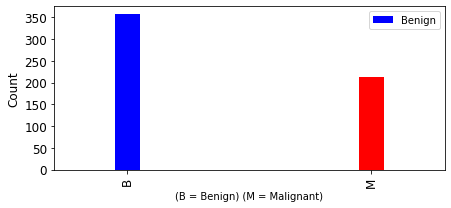

In [22]:
## I adapted the code for this based on https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

df.diagnosis.value_counts() \
    .plot(kind="bar", width=0.1, color=["b", "r"], legend=2, figsize=(7, 3))
## value_counts is useful as it returns a Series containing counts of unique rows in the DataFrame. 
## It allows us to take our two values quite easily to display graph.
plt.xlabel("(B = Benign) (M = Malignant)", fontsize=10)
## Plots label based 
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.legend(['Benign', 'Malignant'], fontsize=10)
plt.show()

This graph shows that we have almost double the amount of benign cases in the dataset compared to the amount of malignant cases. This may potentially mean that we have an unbalanced dataset. Mohammed has wrote "The problem with an unbalanced dataset is that it provides a high level of accuracy just by predicting the majority class, but fails to capture the minority class, which is usually the point of creating the model in the first place. Imbalanced classification approaches were employed in this study to predict breast cancer".[5]

In the next section I will expand on some of the analysis above.

## A literature review on classifiers applied to the Dataset and a Comparison on Their Performance

There are a vast amount of classifiers that have been applied to the dataset and I am going to pick a few over the next section of the project. Firstly to define what a classifier is, In data science, a classifier is a type of machine learning algorithm used to assign a class label to a data input. An example is an image recognition classifier to label an image (e.g., “car,” “truck,” or “person”). Classifier algorithms are trained using labeled data; in the image recognition example, for instance, the classifier receives training data that labels images. After sufficient training, the classifier then can receive unlabeled images as inputs and will output classification labels for each image. In terms of the WBC dataset, a classifier is applied and will analyse the data categorically and continuously.


## Analysis of Breast Cancer Detection Using Different Machine Learning Techniques

The first paper I have looked at is called "Analysis of Breast Cancer Detection Using Different Machine Learning Techniques" [6] This paper looks at "an approach that improves the accuracy and enhances the performance of three different classifiers: Decision Tree (J48), Naïve Bayes (NB), and Sequential Minimal Optimization (SMO). It also validates and compares the classifiers on two benchmark datasets: Wisconsin Breast Cancer (WBC) and Breast Cancer dataset, but I will only be looking at WBC for the purposes of the project in the next section.

I will firstly give a bit more info on the three different classifiers and how they differentiate between one another that were looked at in this paper. Decision Tree (J48). This is a an algorithm to generate a decision tree that is generated by C4.5 (an extension of ID3). It is also known as a statistical classifier. WEKA explorer is used for performing several functions, starting from preprocessing. Preprocessing takes input as a .arff file, processes the input, and gives an output that can be used by other computer programs. In WEKA the output of preprocessing gives the attributes present in the dataset which can be further used for statistical analysis and comparison with class labels.[7]

A Naive Bayes classifier is a probabilistic machine learning model that’s used for a classification task. We can find the probability of A happening, given that B has occurred. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. [8]

John C. Platt's sequential minimal optimization algorithm for training a support vector classifier which he called sequential minimal optimization. This implementation globally replaces all missing values and transforms nominal attributes into binary ones. It also normalizes all attributes by default. SMO will also break the problem into a series of smallest possible sub-problems, which are then solved analytically. [9]


Three classification techniques were selected: a Naïve Bayes (NB), a Decision Tree built on the J48 algorithm, and a Sequential Minimal Optimization (SMO). The NB classifier is a probabilistic classifier based on the Bayes rule. The J48 algorithm uses the concept of information entropy and works by splitting each data attributers into smaller datasets in order to examine entropy differences. It works by estimating the portability of each class value that a given instance belongs to that class. The three classifications algorithms were tested on the Breast Cancer datasets without applying the preprocessing techniques. Among them, the best result was recorded for J48 96.99% in the WBC dataset. Next, after applying preprocessing techniques accuracy increases to 98.20% with J48 99.56% with SMO in the WBC dataset.

First, the three classifiers are tested over original data (without any preprocessing).The results show that J48 is the best one with 75.52% accuracy where the accuracy of NB and SMO are 71.67% and 69.58%, respectively. Next the experiement, applied discretization filter (The discretization filter generates an approximation to the likelihood of any nonlinear) and remove the records with missing values, results improved with NB and SMO as follows: NB: 75.53% and SMO: 72.66% where J48: 74.82%.

With respect to applying preprocessing techniques all algorithms present higher classification accuracy, the difference lies in the fact that using the resample filter several times improves the classification accuracy. SMO classifier achieve 99.56% efficiency compared to 99.12% of the Naïve Bayes and 99.24% of the J48. SMO classifier is better since the model employs pre-processing, and resampling approaches. This utilises pre-processing, and resampling techniques play an important role in increasing the SMO accuracy comparable to the other techniques.